<a href="https://colab.research.google.com/github/PollyBecker/NLP/blob/main/NER_Reconhecimento_de_Entidades_Nomeadas_e_criando_pad%C3%B5es_de_Match_%7C_spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NER Named Entity Recognition
Named Entity Recognition (NER), em Português, Reconhecimento de Entidade Nomeada, é um processo de identificação de entidades predefinidas presentes em um texto, como nome da pessoa, organização, local que já vem pré-definidas no framework spaCy ou entidades que podemos criar com ajuda desta ferramenta.
# Matcher
O Matcher é uma ferramenta no spaCy que permite encontrar sequências de tokens em um documento com base em padrões que você define. Você pode criar padrões usando atributos como texto, formato de caracteres, parte do discurso, entre outros. O Matcher é útil para identificar padrões específicos no texto, como endereços de e-mail, números de telefone, ou qualquer outro tipo de estrutura que você deseja extrair automaticamente de um texto.

# 1- Instalando o SpaCy

https://www.youtube.com/watch?v=2XUhKpH0p4M

https://www.youtube.com/watch?v=9mXoGxAn6pM
https://spacy.io/models

In [1]:
!pip install -U spacy

# 2- Fazendo o dowload do modelo


In [2]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 43.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import spacy
import pt_core_news_sm
nlp = pt_core_news_sm.load()

In [4]:
texto = nlp('Maria mora em Paris')

# Printando as entidades padão do modelo
for entidade in texto.ents:
  print(entidade.text, entidade.label_)

Maria PER
Paris LOC


In [5]:
# Visualização das entidades na frase
spacy.displacy.render(texto, style='ent', jupyter=True)

In [6]:
# O que é cada tipo de entidade(ver na doc do spacy)
print("PER:", spacy.explain('PER'))
print("LOC:", spacy.explain('LOC'))
print("ORG:", spacy.explain('ORG'))
print("MISC:", spacy.explain('MISC'))

PER: Named person or family.
LOC: Non-GPE locations, mountain ranges, bodies of water
ORG: Companies, agencies, institutions, etc.
MISC: Miscellaneous entities, e.g. events, nationalities, products or works of art


In [7]:
text = nlp("Juliana nasceu no dia 18/06/2018 em Fortaleza")
spacy.displacy.render(text, style='ent', jupyter=True)

# 3- Criando um novo tipo de entidade no SpaCy
Aqui o modelo não identificou a data.

O spaCy permite re-treinar o modelo com novos dados melhorar o modelo e até gerar modelos novos.

Como a entidade data não foi identificada, podemos inserir alguns exemplos e re-treinar o algoritmo para que este aprenda novos padrões.

In [8]:
import random

In [9]:
TRAIN_DATA = [
    ("Almira é uma ótima pessoa, gosto muito dela", {"entities": [(0, 6, "PER")]}),
    ("João foi para Campo Grande nas férias", {"entities": [(14, 26, "LOC"), (0, 4, "PER")]}),
    ("Carlos foi visitar João na casa de praia", {"entities": [(0, 6, "PER"), (19, 23, "PER")]}),
    ("No meio do ano irei para São Paulo fazer mais um curso", {"entities": [(25, 34, "LOC")]}),
    ("O sonho dela era ir para Austrália visitar seu irmão", {"entities": [(25, 34, "LOC")]}),
    ("Em 15/07/1988 nasceu essa linda criança", {"entities": [(3, 13, "DATE"), (18, 24, "LOC")]}),
    ("Data de prisão: 10/01/2018", {"entities": [(16, 26, "DATE")]}),
    ("No dia 01/02/2016 foi decretada a sentença", {"entities": [(7, 17, "DATE")]}),
    ("A data da festa foi 07/05/2018", {"entities": [(20, 30, "DATE")]}),
    ("Dia 07/06/2020 choveu pela manhã", {"entities": [(4, 14, "DATE")]}),
    ("Michael Jackson nasceu dia 29/08/1958", {"entities": [(0, 15, "PER"), ( 27, 37, "DATE")]}),
    ("A viagem foi marcada para o dia 21/03/2021", {"entities": [(32, 42, "DATE")]}),
    ("O casamento, que era dia 12/06/2020, foi adiado para o dia 20/07/2020", {"entities": [(25, 35, "DATE"), (59, 68, "DATE")]}),
    ("Dia 21/04/2020 foi feriado", {"entities": [(4, 14, "DATE")]}),
    ("A entrega foi realizada na manhã do dia 18/03/2020 ", {"entities": [(40, 50, "DATE")]}),
    ("Na noite do dia 17/05/2019 aconteceu um eclipse", {"entities": [(16, 26, "DATE")]}),
    ("Rio de Janeiro é a capital do Rio de Janeiro", {"entities": [(0, 14, "LOC"), (30, 44, "LOC")]})
]

In [10]:
import pandas as pd
import os
from tqdm import tqdm
import spacy
from spacy.tokens import DocBin

nlp = spacy.load("en_core_web_sm")

db = DocBin()

for text, annot in tqdm(TRAIN_DATA):
    doc = nlp.make_doc(text)
    ents = []
    for start, end, label in annot["entities"]:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents
    db.add(doc)

os.chdir(r'/content')
db.to_disk("./train.spacy") # salvando o objeto

100%|██████████| 17/17 [00:00<00:00, 1025.25it/s]

Skipping entity
Skipping entity


In [14]:
!python -m spacy init fill-config base_config.cfg config.cfg

✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [15]:
!python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy

✔ Created output directory: output
ℹ Saving to output directory: output
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     61.14    0.00    0.00    0.00    0.00
148     200         12.28    817.43  100.00  100.00  100.00    1.00
348     400          0.00      0.00  100.00  100.00  100.00    1.00
548     600          0.00      0.00  100.00  100.00  100.00    1.00
748     800          0.00      0.00  100.00  100.00  100.00    1.00
948    1000          0.00      0.00  100.00  100.00  100.00    1.00
1148    1200          0.00      0.00  100.00  100.00  100.00    1.00
1348    1400          0.00      0.00  100.00  100.00  100.00   

In [37]:
nlp1 = spacy.load(r"/content/output/model-best")
doc = nlp1("Luana nasceu em Campo Grande em 31/05/2023")

spacy.displacy.render(doc, style="ent", jupyter=True)

In [43]:
doc = nlp1("Paulo e Lucas são amigos desde 10/01/1998")
spacy.displacy.render(doc, style="ent", jupyter=True)

# Matcher
Agora vamos usar o matcher para adicionar padrões que serão encontrados no texto de acondo com o shape do token.

In [18]:
from spacy.matcher import Matcher

texto = """
Meu número é (11) 98765 - 3333 ou sem espaço (11) 98765-4444 e o número do meu amigo é 55 11 8765 5555.
 Caso necessario entre em contato via email pelo miau@gmail.com.
"""
doc = nlp1(texto) # isso foi necessário pois o matcher le documentos ja processados pelo spacy e nao texto puro

matcher1 = Matcher(nlp1.vocab)

# Definir padrões para combinar números de telefone
patterns = [
    [{"TEXT": "("}, {"SHAPE": "dd"}, {"TEXT": ")"}, {"SHAPE": "dddd"}, {"TEXT": "-"}, {"SHAPE": "dddd"}],  # (11) 9876-5555
    [{"TEXT": "("}, {"SHAPE": "dd"}, {"TEXT": ")"},{"SHAPE": "dddd-dddd"}],  # (11) 98765-4444
    [{"SHAPE": "dd"}, {"SHAPE": "dd"}, {"SHAPE": "dddd"}, {"SHAPE": "dddd"}],   # 55 11 8765 5555

]
# Definir padrões para emails
email_pattern = [{'TEXT': {'REGEX': '[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\\.[a-zA-Z]{2,}'}},]
matcher1.add('Regra A', [email_pattern])



# Adicionar os padrões ao matcher
for pattern in patterns:
    matcher1.add("PHONE_NUMBER", [pattern])

# Dando uma olhada no shape_
matches = matcher1(doc)
for token in doc:
    print(token.text, token.shape_,"---------------")
# Extrair e imprimir os números de telefone correspondentes
phone_numbers = [doc[start:end].text for match_id, start, end in matches]
print("Matches extraídos:", phone_numbers)



 
 ---------------
Meu Xxx ---------------
número xxxx ---------------
é x ---------------
( ( ---------------
11 dd ---------------
) ) ---------------
98765 dddd ---------------
- - ---------------
3333 dddd ---------------
ou xx ---------------
sem xxx ---------------
espaço xxxx ---------------
( ( ---------------
11 dd ---------------
) ) ---------------
98765-4444 dddd-dddd ---------------
e x ---------------
o x ---------------
número xxxx ---------------
do xx ---------------
meu xxx ---------------
amigo xxxx ---------------
é x ---------------
55 dd ---------------
11 dd ---------------
8765 dddd ---------------
5555 dddd ---------------
. . ---------------

  
  ---------------
Caso Xxxx ---------------
necessario xxxx ---------------
entre xxxx ---------------
em xx ---------------
contato xxxx ---------------
via xxx ---------------
email xxxx ---------------
pelo xxxx ---------------
miau@gmail.com xxxx@xxxx.xxx ---------------
. . ---------------

 
 ---------------
Mat

In [19]:
nlp2 = spacy.load("pt_core_news_sm")
texto = """Ana comeu batatas.
Pedro foi ao cinema com Joana.
Ontem encontrei uma amiga no Shopping.
Ana irá viajar na próxima semana"""
doc = nlp2(texto)

In [20]:
for token in doc:
    print(token.text, token.pos_,token.morph)

Ana PROPN Gender=Fem|Number=Sing
comeu VERB Mood=Sub|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin
batatas NOUN Gender=Fem|Number=Plur
. PUNCT 

 SPACE 
Pedro PROPN Gender=Masc|Number=Sing
foi VERB Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
ao ADP Definite=Def|Gender=Masc|Number=Sing|PronType=Art
cinema NOUN Gender=Masc|Number=Sing
com ADP 
Joana PROPN Gender=Fem|Number=Sing
. PUNCT 

 SPACE 
Ontem ADV 
encontrei VERB Mood=Ind|Number=Sing|Person=1|Tense=Past|VerbForm=Fin
uma DET Definite=Ind|Gender=Fem|Number=Sing|PronType=Art
amiga NOUN Gender=Fem|Number=Sing
no ADP Definite=Def|Gender=Masc|Number=Sing|PronType=Art
Shopping PROPN Gender=Masc|Number=Sing
. PUNCT 

 SPACE 
Ana PROPN Gender=Fem|Number=Sing
irá AUX Mood=Ind|Number=Sing|Person=3|Tense=Fut|VerbForm=Fin
viajar VERB VerbForm=Inf
na ADP Definite=Def|Gender=Fem|Number=Sing|PronType=Art
próxima ADJ Gender=Fem|Number=Sing
semana NOUN Gender=Fem|Number=Sing


Agora usaremos o matcher para selecionar parte do discurso de acordo com a classificação morfológica, sintática e padrões especificos

In [21]:
#Aqui vamos criar uma regra para pegar apenas a senteça realizada por uma mulher que esteja no passado
patern_past_fem = [{'POS':'PROPN', 'MORPH':{'IS_SUPERSET':["Gender=Fem"]}},
                   {'MORPH':{'IS_SUPERSET':['Tense=Pres']}},
                   {'OP':'?'},
                   {'POS':'NOUN'}
                   ]

In [22]:
matcher2 = Matcher(nlp2.vocab)
matcher2.add('Regra B', [patern_past_fem])

In [23]:
matches = matcher2(doc)
for match_id, start, end in matches:
  print(doc[start:end].text)

Ana comeu batatas


In [47]:
from spacy.scorer import Scorer
from spacy.training.example import Example
import spacy
from spacy.training import Example
from spacy.scorer import Scorer
from spacy.training import offsets_to_biluo_tags

def check_alignment(nlp, text, entities):
    doc = nlp.make_doc(text)
    biluo_tags = offsets_to_biluo_tags(doc, entities)
    if '-' in biluo_tags:
        print(f"Warning: Some entities could not be aligned in the text: {text} with entities: {entities}")
    return biluo_tags

def evaluate(ner_model, examples):
    scorer = Scorer()
    example_objects = []
    for input_, annotations in examples:
        check_alignment(nlp1, input_, annotations["entities"])
        doc = nlp1(input_)
        example = Example.from_dict(doc, annotations)
        example_objects.append(example)
    scores = scorer.score(example_objects)
    return scores

# Exemplos para avaliação
examples = [
    ("Ana comprou um presente para Maria", {"entities": [(0, 3, "PER"), (24, 29, "PER")]}),
    ("Pedro e Paula viajaram para Nova York", {"entities": [(0, 5, "PER"), (8, 13, "PER"), (27, 36, "LOC")]}),
    ("Luiz e Carla vão ao cinema", {"entities": [(0, 4, "PER"), (7, 12, "PER")]}),
    ("Marcelo mora em Belo Horizonte", {"entities": [(0, 7, "PER"), (16, 30, "LOC")]}),
    ("Irei visitar o Rio de Janeiro nas férias", {"entities": [(15, 29, "LOC")]}),
    ("O evento ocorrerá em 25/12/2022", {"entities": [(20, 30, "DATE")]}),
    ("Mariana viajou para Paris em março", {"entities": [(0, 7, "PER"), (19, 24, "LOC")]}),
    ("A reunião está marcada para 10/10/2021", {"entities": [(30, 40, "DATE")]}),
    ("Fui ao show do Paul McCartney", {"entities": [(15, 29, "PER")]}),
    ("Carlos e Ana foram para a Alemanha", {"entities": [(0, 6, "PER"), (9, 12, "PER"), (26, 33, "LOC")]}),
    ("O projeto deve ser concluído em 01/07/2022", {"entities": [(31, 41, "DATE")]}),
    ("Carla visitou Lisboa no verão", {"entities": [(0, 5, "PER"), (14, 20, "LOC")]}),
    ("O festival acontecerá em 15/08/2023", {"entities": [(23, 33, "DATE")]}),
    ("Paulo nasceu em 05/04/1995", {"entities": [(0, 5, "PER"), (14, 24, "DATE")]}),
    ("Maria foi ao parque Ibirapuera", {"entities": [(0, 5, "PER"), (18, 28, "LOC")]}),
    ("A viagem para Buenos Aires foi inesquecível", {"entities": [(13, 25, "LOC")]}),
    ("O museu abre em 20/09/2024", {"entities": [(16, 26, "DATE")]}),
    ("Joana adora o Rio de Janeiro", {"entities": [(0, 5, "PER"), (14, 28, "LOC")]}),
    ("A conferência será em 30/11/2021", {"entities": [(22, 32, "DATE")]}),
    ("Leonardo passou as férias em Roma", {"entities": [(0, 8, "PER"), (29, 33, "LOC")]}),
    ("A exposição vai até 15/06/2022", {"entities": [(20, 30, "DATE")]}),
    ("Sara e Luiz foram para Paris", {"entities": [(0, 4, "PER"), (7, 11, "PER"), (23, 28, "LOC")]}),
    ("O show do Coldplay será em 05/12/2021", {"entities": [(23, 33, "DATE")]}),
    ("Marcela nasceu no Rio de Janeiro", {"entities": [(0, 7, "PER"), (18, 32, "LOC")]}),
    ("A final do campeonato será em 10/03/2024", {"entities": [(29, 39, "DATE")]}),

]

# Avalia o modelo
results = evaluate(nlp1, examples)

# Aqui você pode imprimir os resultados
for key, value in results.items():
    print(f"{key}: {value}")


token_acc: 1.0
token_p: 1.0
token_r: 1.0
token_f: 1.0
sents_p: None
sents_r: None
sents_f: None
tag_acc: None
pos_acc: None
morph_acc: None
morph_micro_p: None
morph_micro_r: None
morph_micro_f: None
morph_per_feat: None
dep_uas: None
dep_las: None
dep_las_per_type: None
ents_p: 0.7692307692307693
ents_r: 0.7142857142857143
ents_f: 0.7407407407407408
ents_per_type: {'LOC': {'p': 0.5714285714285714, 'r': 0.5714285714285714, 'f': 0.5714285714285714}, 'PER': {'p': 0.8125, 'r': 0.7222222222222222, 'f': 0.7647058823529411}, 'DATE': {'p': 1.0, 'r': 1.0, 'f': 1.0}}
cats_score: 0.0
cats_score_desc: macro F
cats_micro_p: 0.0
cats_micro_r: 0.0
cats_micro_f: 0.0
cats_macro_p: 0.0
cats_macro_r: 0.0
cats_macro_f: 0.0
cats_macro_auc: 0.0
cats_f_per_type: {}
cats_auc_per_type: {}


/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Ana comprou um presente para Maria" with entities "[(0, 3, 'PER'), (24, 29, 'PER')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Pedro e Paula viajaram para Nova York" with entities "[(0, 5, 'PER'), (8, 13, 'PER'), (27, 36, 'LOC')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "O evento ocorrerá em 25/12/2022" with en

In [48]:
from collections import defaultdict

def evaluate_with_confusion_matrix(ner_model, examples):
    confusion_matrix = defaultdict(lambda: {'TP': 0, 'FP': 0, 'FN': 0})
    for input_, annotations in examples:
        doc = ner_model(input_)
        # Entidades previstas pelo modelo
        predicted_entities = [(ent.start_char, ent.end_char, ent.label_) for ent in doc.ents]
        # Entidades verdadeiras do exemplo
        true_entities = annotations['entities']

        # Calcula TP, FP e FN para cada tipo de entidade
        for true_ent in true_entities:
            if true_ent in predicted_entities:
                # Verdadeiro positivo
                confusion_matrix[true_ent[2]]['TP'] += 1
                # Remove para evitar dupla contagem
                predicted_entities.remove(true_ent)
            else:
                # Falso negativo
                confusion_matrix[true_ent[2]]['FN'] += 1

        # Conta falsos positivos para as entidades previstas, mas não presentes no exemplo
        for pred_ent in predicted_entities:
            confusion_matrix[pred_ent[2]]['FP'] += 1

    # Calcula precisão, recall e F1 para cada tipo de entidade
    for ent_type, counts in confusion_matrix.items():
        TP = counts['TP']
        FP = counts['FP']
        FN = counts['FN']
        precision = TP / (TP + FP) if TP + FP > 0 else 0
        recall = TP / (TP + FN) if TP + FN > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
        confusion_matrix[ent_type]['precision'] = precision
        confusion_matrix[ent_type]['recall'] = recall
        confusion_matrix[ent_type]['f1'] = f1

    return confusion_matrix

confusion_matrix = evaluate_with_confusion_matrix(nlp1, examples)
for ent_type, counts in confusion_matrix.items():
    print(f"Entity type: {ent_type}")
    print(f"TP: {counts['TP']}, FP: {counts['FP']}, FN: {counts['FN']}")
    print(f"Precision: {counts['precision']}, Recall: {counts['recall']}, F1: {counts['f1']}")
    print()


Entity type: PER
TP: 13, FP: 3, FN: 6
Precision: 0.8125, Recall: 0.6842105263157895, F1: 0.742857142857143

Entity type: LOC
TP: 4, FP: 7, FN: 8
Precision: 0.36363636363636365, Recall: 0.3333333333333333, F1: 0.34782608695652173

Entity type: DATE
TP: 3, FP: 7, FN: 7
Precision: 0.3, Recall: 0.3, F1: 0.3



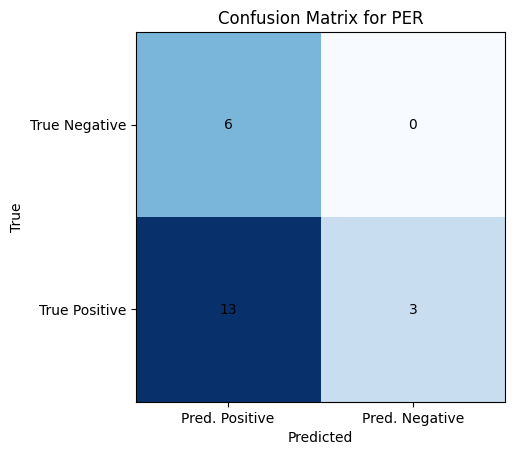

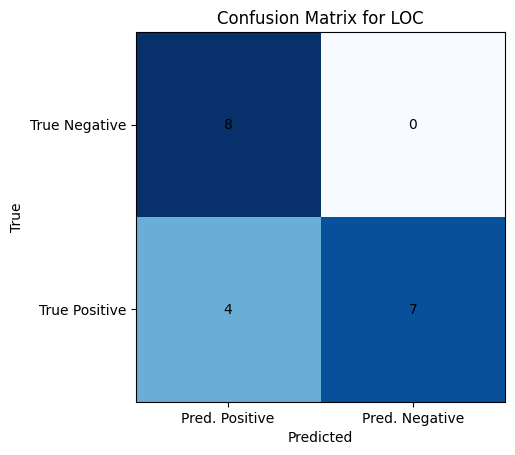

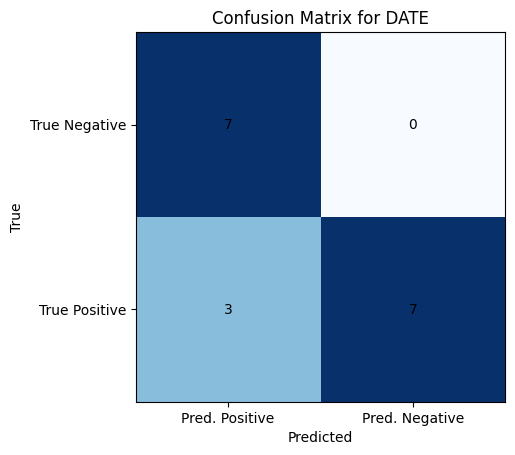

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Função para plotar a matriz de confusão para um tipo de entidade específico
def plot_confusion_matrix_for_entity(entity_type, confusion_matrix):
    values = np.array([[confusion_matrix[entity_type]['TP'], confusion_matrix[entity_type]['FP']],
                       [confusion_matrix[entity_type]['FN'], 0]])  # Não estamos usando os falsos negativos na plotagem
    fig, ax = plt.subplots()
    im = ax.imshow(values, cmap='Blues')

    # Adiciona textos aos quadrados
    for i in range(2):
        for j in range(2):
            text = ax.text(j, i, values[i, j],
                           ha="center", va="center", color="black")

    ax.set_xticks(np.arange(2))
    ax.set_yticks(np.arange(2))
    ax.set_xticklabels(['Pred. Positive', 'Pred. Negative'])
    ax.set_yticklabels(['True Positive', 'True Negative'])

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {entity_type}')
    plt.xticks(np.arange(2))
    plt.yticks(np.arange(2))
    plt.gca().invert_yaxis()
    plt.show()

confusion_matrix = evaluate_with_confusion_matrix(nlp1, examples)
for entity_type in confusion_matrix.keys():
    plot_confusion_matrix_for_entity(entity_type, confusion_matrix)
